
本节会学习：
1. 什么是线性回归模型
2. 线性回归模型的目标是什么，如何评价模型的好坏
- 最小化损失，即残差平方和SSE/均方误差MSE，越小表明模型预测值跟真实值之间的误差越小
3. 最小二乘法是什么，为什么可以实现最小化损失
4. 什么是梯度下降SGD，为什么使用



# 线性回归 Linear Regression

现来看以下这样一组数据，假设为投入的营销费用和广告点击的关系，可以看到他们大致呈现正相关关系。在蓝点的中间，我们可以拟合初一条红色的线。这样，如果我们想知道一个新的广告方案的投入金额和点击的关系，就可以用红色线性方程y = 3x + 2来做预估，这个过程其实就是线性回归和利用线性回归做预测的过程。

但，这会产生2个问题：
- 当最开始我们有这一堆点的时候，怎么找出一个拟合的线性方程？-->拟合线性回归方程求解
- 我们怎么保证我们求的解就是最好的？比如同样有一根绿色线代表的方程，此时也穿过了大部分的点？-->损失函数求最小

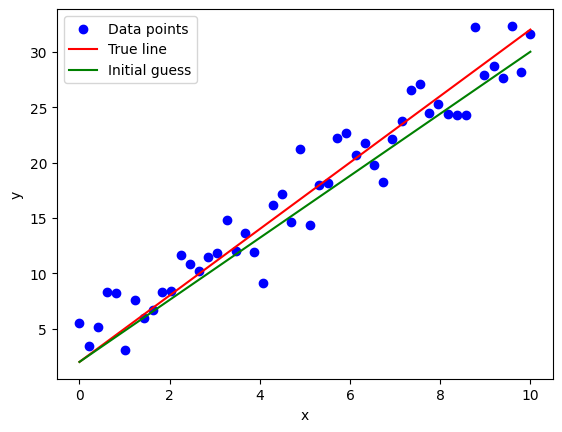

In [3]:
import numpy as np

# 设置随机种子，方便结果复现
np.random.seed(0)

# 生成 x
x = np.linspace(0, 10, 50)

# 真实模型: y = 3x + 2 + noise
true_w = 3
true_b = 2

noise = np.random.normal(0, 2, size=x.shape)
y = true_w * x + true_b + noise

#可视化
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, true_w * x + true_b, color='red', label='True line')
plt.plot(x, 2.8 * x + 2, color='green', label='Initial guess')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## 1.拟合过程（最小二乘法）
线性回归是机器学习中最经典、最简单的模型之一，主要用于回归任务。模型的输入为 $x$，目标是拟合一个线性方程 $y = wx + b$，通过寻找最佳的 $w$ 和 $b$，使得所有样本的累计平方误差之和 $\sum (y - \hat{y})^2$ 最小。

这里的 $(y - \hat{y})^2$ 称为平方误差（Least Squares），平方是为了消除符号带来的影响，并且放大离群值的影响。
而他们的和，一般称之为残差平方和SSE（Sum of Squares for Error），另一个经常使用的是MSE（均方误差），在机器学习中它是回归问题中最常用的损失函数。

我们追求最小化这个损失函数的过程称为最小二乘法估计（会使用求偏导）

下面通过一个实际例子来理解线性回归的过程。最后我们将使用 sklearn 库中的线性回归模型，对一个经典数据集进行训练和求解。

先不管参数的问题，我们最终找到的线性方程是否有，对于任意预测的 $\hat{y}$，我们有 $\hat{y} = wx + b$。

那么，如果我们想让这条线更加的准，就应该让这条线的预测 $\hat{y}$ 和真实的 $y$ 差值尽量的小，也就有了 SSE（残差平方和）的概念，公式如下：

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (wx_i + b))^2  
$$

其中，$y_i$ 是第 $i$ 个样本的真实值，$\hat{y}_i$ 是模型预测值，$n$ 是样本数量。我们希望通过调整参数 $w$ 和 $b$，使得 SSE 最小化，从而得到最优的线性回归模型。

因此我们下一步的问题变成了如何找到最小的SSE？

对于SSE的方程,从几何角度来看，它是一个开口向上的凸曲面（类似于一个碗状）。在数学上，凸函数的一个优良性质是：它的局部极小值就是全局最小值。因此，我们要寻找最小的 SSE，实际上就是寻找这个“碗”底部的点，即函数导数为 0 的地方


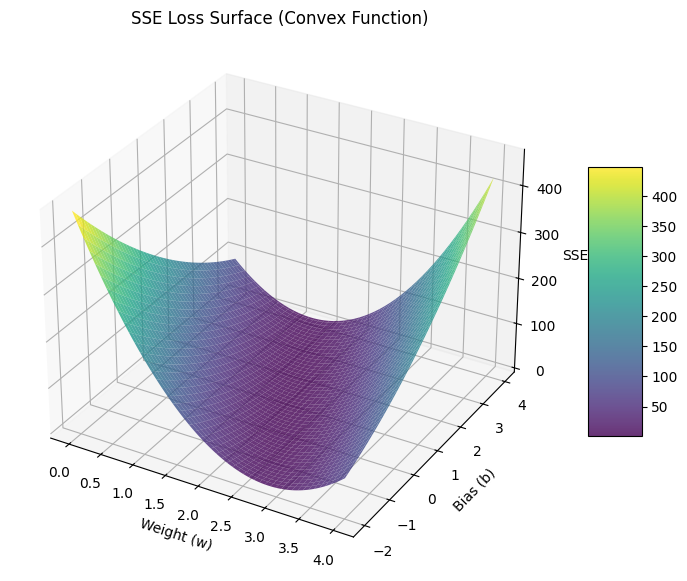

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 生成模拟数据 (y = 2x + 1)
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5])
y = 2 * x + 1 + np.random.normal(0, 0.5, 5) # 添加一点噪声

# 2. 定义 SSE 函数
def calculate_sse(w, b, x, y):
    sse = 0
    for i in range(len(x)):
        sse += (y[i] - (w * x[i] + b))**2
    return sse

# 3. 创建参数 w 和 b 的网格
w_range = np.linspace(0, 4, 100) # w 的搜索范围
b_range = np.linspace(-2, 4, 100) # b 的搜索范围
W, B = np.meshgrid(w_range, b_range)

# 4. 计算对应的 SSE 值
# 这里使用 np.vectorize 让函数支持矩阵运算
sse_func = np.vectorize(lambda w, b: calculate_sse(w, b, x, y))
Z = sse_func(W, B)

# 5. 绘图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# 标注
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('SSE')
ax.set_title('SSE Loss Surface (Convex Function)')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

最小二乘法（Ordinary Least Squares）：利用微积分，分别对 $w$ 和 $b$ 求偏导并令其为 0，从而直接解出参数的解析表达式
们需要对 $w$ 和 $b$ 分别求偏导数：
$$
\frac{\partial SSE}{\partial w} = \sum_{i=1}^{n} 2(y_i - (wx_i + b)) \cdot (-x_i) = 0
$$
$$
\frac{\partial SSE}{\partial b} = \sum_{i=1}^{n} 2(y_i - (wx_i + b)) \cdot (-1) = 0
$$
通过展开和整理上述方程组（通常称为正规方程 Normal Equations）

In [ ]:
# 构造设计矩阵：第二列是全1，对应偏置 b
X = np.column_stack([x, np.ones_like(x)])

In [ ]:
# Normal Equation: theta = (X^T X) ^(-1) X^T y
XtX = X.T @ X
Xty = X.T @ y

theta = np.linalg.inv(XtX) @ Xty

w_hat = theta[0]
b_hat = theta[1]

print("Estimated w:", w_hat)
print("Estimated b:", b_hat)


# 用求得的参数来预测
y_pred = X @ theta

# 看一下平均误差
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)


Estimated w: 2.7176755014019642
Estimated b: 3.692741037616382
MSE: 4.375870091712563


# 附录
MSE公式：
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

正规方程组(单特征x下)求解推导过程：
1. $\sum_{i=1}^{n} (y_i - wx_i - b) = 0$  ，由 $\frac{\partial S}{\partial b} = 0$ 整理得来
2. $\sum_{i=1}^{n} (y_i - wx_i - b)x_i = 0$ ，由 $\frac{\partial S}{\partial w} = 0$ 整理得来

- 先解 $b$，利用求和符号的分配律展开方程 (1)：$$\sum y_i - w\sum x_i - \sum b = 0$$注意 $\sum_{i=1}^{n} b = nb$，所以：$$nb = \sum y_i - w\sum x_i$$两边同时除以 $n$：$$b = \bar{y} - w\bar{x}$$其中 $\bar{y}$ 和 $\bar{x}$ 是均值。这说明：最佳拟合直线一定经过样本的中心点。

- 再解 $w$,将解出的 $b$ 代入方程 (2) 中，通过一系列繁琐的移项、合并同类项，最终就能得到回归系数公式：$$w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$



多参数下求解过程：
特征变多（比如不仅有 $x$，还有 $x_1, x_2, \dots$）时，代数公式会变得极其冗长，这个时候我们可以通过矩阵求解（还记得矩阵适合用来求解多项式方程组吗？）
我们将所有的方程写在一起。对于每一个样本 $i$，拟合方程是 $y_i \approx wx_i + b$。为了统一，我们给 $b$ 配一个始终为 1 的系数。设：

$y$ (目标向量): $\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$

$X$ (特征矩阵): $\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$ （第一列全为 1，对应截距 $b$）

$\beta$ (参数向量): $\begin{bmatrix} b \\ w \end{bmatrix}$

则所有样本的线性回归方程可以写成矩阵形式：

$$
X\beta = y
$$

即：
$$
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b \\
w
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

